In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

In [3]:
ddos_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\DDoS_resample.csv')
ddos_df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.045263,-0.015250,-0.005277,-0.005954,0.289320,-0.002643,0.322770,0.323287,0.323284,-0.016174,...,0.226640,-0.007737,-0.005256,-0.007436,-0.006370,-0.013105,-0.005207,-0.013185,-0.012838,-1
1,0.045263,-0.015250,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,...,0.226640,-0.007737,-0.005256,-0.007436,-0.006370,-0.013105,-0.005207,-0.013185,-0.012838,-1
2,0.045263,-0.015250,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,...,0.226640,-0.007737,-0.005256,-0.007436,-0.006370,-0.013105,-0.005207,-0.013185,-0.012838,-1
3,0.045263,-0.015249,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,...,0.226640,-0.007737,-0.005256,-0.007436,-0.006370,-0.013105,-0.005207,-0.013185,-0.012838,-1
4,0.045263,-0.015250,-0.005277,-0.005954,0.289320,-0.002643,0.322770,0.323287,0.323284,-0.016174,...,0.226646,-0.007737,-0.005256,-0.007436,-0.006370,-0.013105,-0.005207,-0.013185,-0.012838,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29029,2.209517,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,...,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1
29030,2.209517,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,...,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1
29031,2.209517,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,...,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1
29032,2.209517,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,...,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1


In [4]:
benign_test_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\Benign_resample_4000.csv')

In [5]:
# novelty detection
df = pd.concat([benign_test_df, ddos_df], ignore_index=True)

In [6]:
clean_dataset = df.drop([" Protocol", ' Label'], axis=1)

In [7]:
tres = 0.1

lowvariancefilter = VarianceThreshold(threshold=tres)
lowvariancefilter.fit_transform(clean_dataset)

filtered_cols = clean_dataset.drop(
    columns=clean_dataset.columns[lowvariancefilter.get_support()].array
).columns.array

lowvariance_dataset = clean_dataset.drop(columns=filtered_cols)
lowvariance_dataset

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.343690,-0.086569,0.096351,0.142000,0.002723,0.706619,1.982467,1.798333,-0.034669,0.643201,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
1,5.598377,2.253048,4.681794,3.829148,0.125465,3.569438,-0.039001,2.481753,5.125594,0.931779,...,6.200510,-0.059807,1.103561,0.162506,0.515708,1.673959,6.184780,12.942534,8.511326,2.479016
2,-0.344938,-0.176134,0.096351,-0.053129,-0.005474,-0.046063,-0.039001,-0.049093,-0.034669,0.003313,...,-0.472948,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
3,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,-0.071968,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
4,-0.343689,-0.086569,0.096351,0.147135,0.002883,0.728125,2.040223,1.851116,-0.034669,0.655748,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33032,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,-0.065050,...,-0.366263,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924
33033,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,-0.065050,...,-0.366263,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924
33034,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,-0.065050,...,-0.366263,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924
33035,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,-0.065050,...,-0.366263,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924


In [8]:
lowvariance_dataset["Label"] = df[" Label"].astype('category').cat.codes
lowvariance_dataset["Label"]

0        1
1        1
2        1
3        1
4        1
        ..
33032    0
33033    0
33034    0
33035    0
33036    0
Name: Label, Length: 33037, dtype: int8

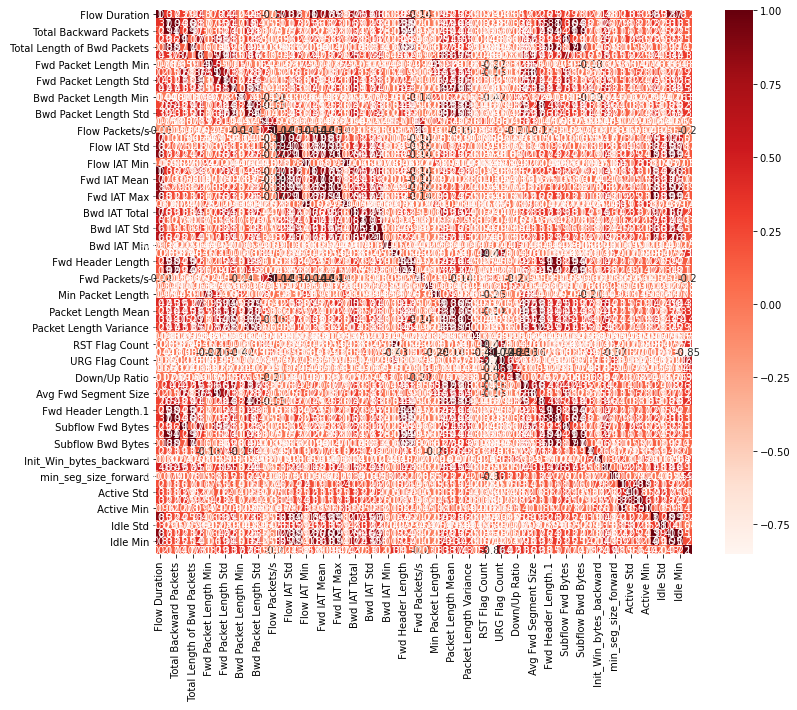

In [9]:
plt.figure(figsize=(12,10))
cor = lowvariance_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
cor_target = abs(cor["Label"])
cor_target

 Flow Duration                  0.195773
 Total Fwd Packets              0.170150
 Total Backward Packets         0.138475
Total Length of Fwd Packets     0.172205
 Total Length of Bwd Packets    0.078162
                                  ...   
Idle Mean                       0.200596
 Idle Std                       0.042955
 Idle Max                       0.169637
 Idle Min                       0.224338
Label                           1.000000
Name: Label, Length: 66, dtype: float64

In [11]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

 Fwd Packet Length Max      0.313908
 Fwd Packet Length Mean     0.286524
 Fwd Packet Length Std      0.325535
Bwd Packet Length Max       0.372636
 Bwd Packet Length Min      0.371507
 Bwd Packet Length Mean     0.375340
 Bwd Packet Length Std      0.349273
 Flow Packets/s             0.202090
Bwd IAT Total               0.270897
Fwd PSH Flags               0.389650
Fwd Packets/s               0.202314
 Max Packet Length          0.375012
 Packet Length Mean         0.366202
 Packet Length Std          0.402088
 Packet Length Variance     0.305987
 RST Flag Count             0.389650
 ACK Flag Count             0.850048
 URG Flag Count             0.643484
 CWE Flag Count             0.421029
 Down/Up Ratio              0.311378
 Average Packet Size        0.358045
 Avg Fwd Segment Size       0.286524
 Avg Bwd Segment Size       0.375340
 Init_Win_bytes_backward    0.243253
 min_seg_size_forward       0.479612
Idle Mean                   0.200596
 Idle Min                   0.224338
L